# Figure 4E, F

### Import packages

In [1]:
import ABCParse
import adata_query
import cellplots as cp
import larry
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scdiffeq as sdq

cmap = larry.pl.InVitroColorMap()._dict

### Load data

Reference `adata`:

In [2]:
h5ad_path = "/home/mvinyard/data/adata.reprocessed_19OCT2023.more_feature_inclusive.h5ad"
adata = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'


Simulated `adata_sim`

In [4]:
h5ad_path = "/home/mvinyard/experiments/LARRY.full_dataset/v1/simulated/version_3/adata_19977.h5ad"
adata_sim = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 82000 × 50
    obs: 't', 'z0_idx', 'sim_i', 'sim', 'state', 'fate', 'drift', 'diffusion'
    uns: 'fate_counts', 'h5ad_path', 'sim_idx', 'simulated'
    obsm: 'X_diffusion', 'X_drift'


### UMAP

Load model

In [5]:
UMAP_model = sdq.io.read_pickle("/home/mvinyard/data/umap_model.pkl")

Transform the data and update `adata` object

In [6]:
adata_sim.obsm['X_umap'] = UMAP_model.transform(adata_sim.X)

### Define plotting function

In [38]:
def plot_umap_obs_col(
    adata,
    adata_sim,
    key: str,
    title: str,
    max_color: str,
):
    fig, axes = cp.plot(nplots = 2, ncols=2, height = 1, width = 1, delete='all', del_xy_ticks=[True])
    _axes = cp.umap_manifold(
        adata,
        groupby="Cell type annotation",
        c_background=cmap,
        s_background=50,
        s_cover=30,
        ax = axes[0],
    )
    _axes = cp.umap_manifold(adata_sim, ax = axes[0], s_background=50, s_cover=30, clean_stdev=None)
    c = adata_sim.obs[key]
    xu = adata_sim.obsm['X_umap']
    c_idx = np.argsort(c)
    img = axes[0].scatter(
        xu[c_idx, 0],
        xu[c_idx, 1],
        c=c[c_idx],
        s=25,
        zorder=201,
        cmap = cp.tl.custom_cmap(
            min_color=cp.tl.convert_matplotlib_colorname("white"),
            max_color=cp.tl.convert_matplotlib_colorname(max_color),
        ),
        rasterized=True,
        alpha=0.5,
        ec="None",
    )
    xu_init = adata_sim[adata_sim.obs['t'] == 2].obsm['X_umap'].mean(0)
    colors, sizes = ["k", "w", "r"], [80, 60, 20]
    for i in range(3):
        axes[0].scatter(
            xu_init[0],
            xu_init[1],
            c=colors[i],
            s=sizes[i],
            zorder=301 + i,
            rasterized=True,
            ec="None",
        )
    plt.colorbar(mappable=img, ax=axes[1], location="left", shrink = 0.6)
    plt.savefig(f"{title}.{key}.svg", dpi = 250)

### Plot drift UMAP

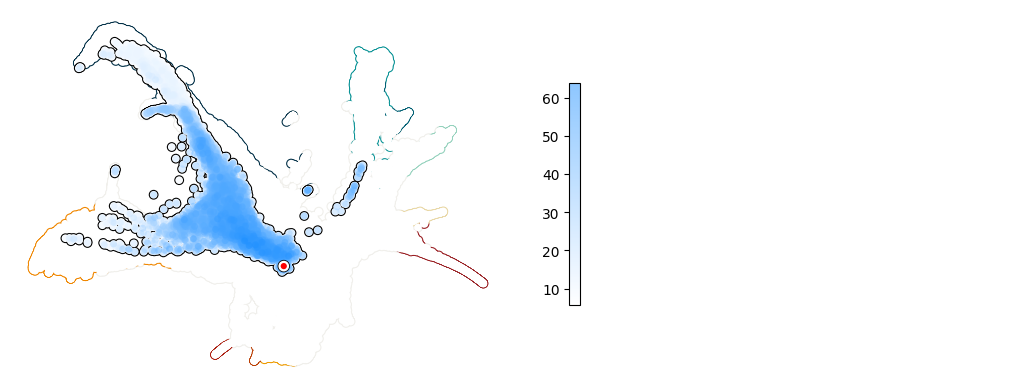

In [39]:
plot_umap_obs_col(adata, adata_sim, key = "drift", title = "Figure4E", max_color = "dodgerblue")

### Plot diffusion UMAP

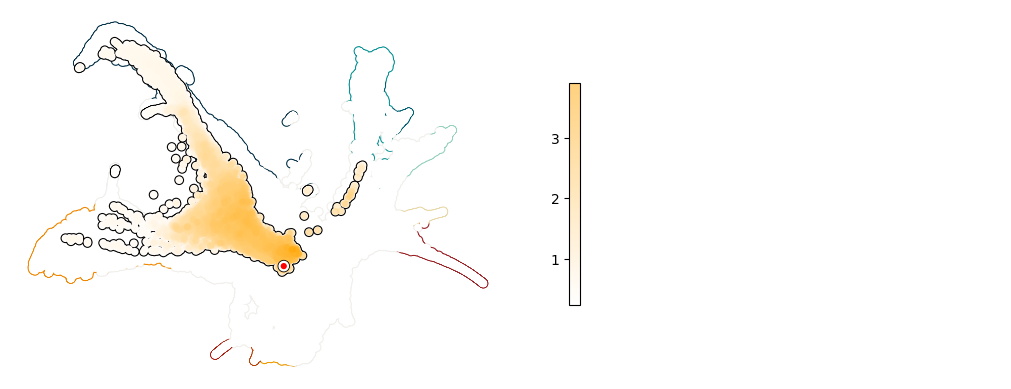

In [40]:
plot_umap_obs_col(adata, adata_sim, key = "diffusion", title = "Figure4F", max_color = "orange")